<a href="https://colab.research.google.com/github/armahin/python/blob/main/Density%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50,scale=5,size=1000)
sample

**Parametric Density Estimation**

In [32]:
mn = sample.mean()

In [33]:
std = sample.std()

(array([  2.,  12.,  48., 116., 181., 233., 219., 116.,  54.,  19.]),
 array([32.57371639, 35.71080866, 38.84790093, 41.9849932 , 45.12208547,
        48.25917774, 51.39627001, 54.53336228, 57.67045455, 60.80754682,
        63.94463909]),
 <BarContainer object of 10 artists>)

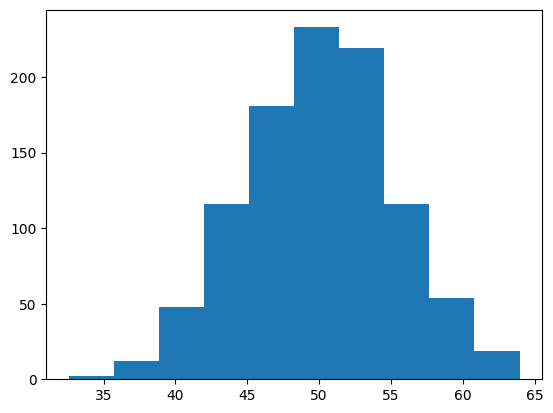

In [34]:
plt.hist(sample,bins=10)

In [35]:
#Fit the distribution with above parameters
from scipy.stats import norm
dist = norm(mn,std)

In [36]:
values = np.linspace(sample.min(),sample.max(),100)

In [37]:
probabilities = [dist.pdf(i) for i in values]

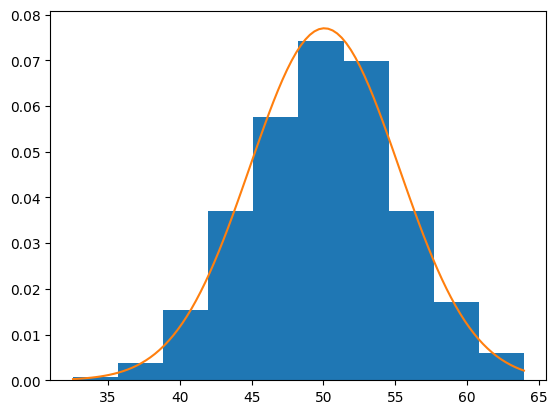

In [39]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

**Non-Parametric Density Estimation**

In [40]:
sample1 = normal(loc=20, scale = 5 , size = 300)
sample2 = normal(loc=50, scale = 5 , size = 700)
sample = np.hstack((sample1,sample2))

In [41]:
sample

array([17.44720427, 14.3344    , 18.77578343, 24.91534418, 26.3323015 ,
       23.86109365, 21.10456235, 24.69202642, 21.36252535, 19.62376558,
       22.56147187, 28.25247903, 19.90007344, 15.39561174, 20.12628432,
       14.43324551, 13.80460748, 22.68376731, 13.7507871 , 17.57233699,
       24.79133487, 24.04157033, 19.84059291, 23.54143176, 22.94156715,
       23.53787866, 17.67325804, 22.84396291,  5.68990336, 17.48380636,
       21.43829202, 14.52601638, 22.0709771 , 20.44418873, 18.83231948,
       23.76273134, 15.38111815, 17.4339102 , 19.32951168, 15.21030281,
       21.33563835, 17.08219934, 28.24602039, 14.01747443, 26.81135472,
       26.9634016 , 24.00360322, 19.38944159, 24.17824811, 14.67715387,
       24.61632218, 20.60032653, 19.1283693 , 18.49872861, 22.42205698,
       26.10900094, 20.89245677, 15.31480034,  6.33393998, 18.16072832,
       18.38555603, 30.47692079, 21.53561322, 17.14924463, 22.10471802,
       17.663194  , 12.13873565, 21.81006477, 18.02382517, 23.64

(array([ 2.,  1.,  2.,  2.,  3.,  3.,  6.,  9., 20., 22., 19., 19., 33.,
        24., 28., 29., 28., 12., 11.,  9.,  5.,  7.,  4.,  2.,  2.,  2.,
         2.,  5.,  5., 10.,  8., 22., 18., 31., 40., 44., 72., 65., 67.,
        62., 59., 52., 39., 33., 25., 12., 12.,  5.,  4.,  4.]),
 array([ 4.62398884,  5.80573276,  6.98747668,  8.1692206 ,  9.35096453,
        10.53270845, 11.71445237, 12.8961963 , 14.07794022, 15.25968414,
        16.44142807, 17.62317199, 18.80491591, 19.98665984, 21.16840376,
        22.35014768, 23.53189161, 24.71363553, 25.89537945, 27.07712337,
        28.2588673 , 29.44061122, 30.62235514, 31.80409907, 32.98584299,
        34.16758691, 35.34933084, 36.53107476, 37.71281868, 38.89456261,
        40.07630653, 41.25805045, 42.43979438, 43.6215383 , 44.80328222,
        45.98502614, 47.16677007, 48.34851399, 49.53025791, 50.71200184,
        51.89374576, 53.07548968, 54.25723361, 55.43897753, 56.62072145,
        57.80246538, 58.9842093 , 60.16595322, 61.34769715,

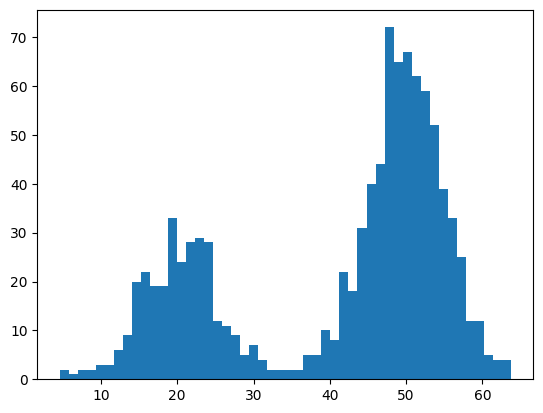

In [42]:
plt.hist(sample,bins= 50)

In [75]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth = 1.5, kernel = 'gaussian')
#COVERT DATA TO A 2D ARRAY
sample = sample.reshape((len(sample),1))

In [76]:
model.fit(sample)

KernelDensity(bandwidth=1.5)

In [77]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [78]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

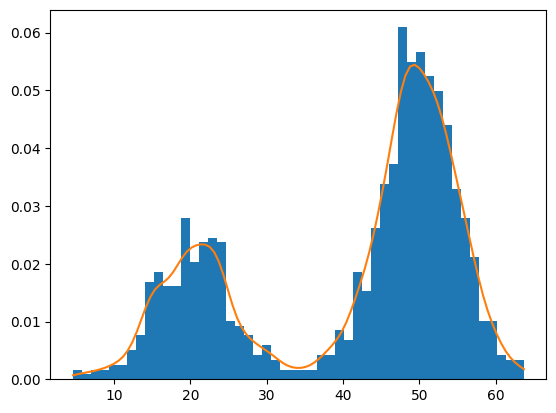

In [79]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()